In [1]:
# What makes a good wine?
# Goal - Use logistic regression to predict which wines will be of better quality

#import libaries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt

#removing warnings from the output
import warnings
warnings.filterwarnings("ignore")

#### Load dataset into a pandas dataframe

In [2]:
#https://www.kaggle.com/datasets/yasserh/wine-quality-dataset
wine_quality = pd.read_csv('WineQT.csv')

In [3]:
#taking a peek at the dataset
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
#check the columns and info in data
wine_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [5]:
#check the data size
wine_quality.shape

(1143, 13)

In [6]:
wine_quality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [7]:
#what vlues in quality
wine_quality['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [8]:
#mean of quality
wine_quality['quality'].mean()

5.657042869641295

In [9]:
#if quality score<mean then is 0(bad)
wine_quality.loc[wine_quality['quality'] < wine_quality['quality'].mean(), 'quality'] = 0

In [10]:
#if quality score>mean then is 1(good)
wine_quality.loc[wine_quality['quality'] > wine_quality['quality'].mean(), 'quality'] = 1

In [11]:
#check if change is successful
wine_quality['quality'].unique()

array([0, 1])

In [12]:
#new data values
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,4


In [13]:
wine_quality.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,1,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0,1597


#### Generate at least 3 data visualizations

<AxesSubplot:xlabel='quality', ylabel='count'>

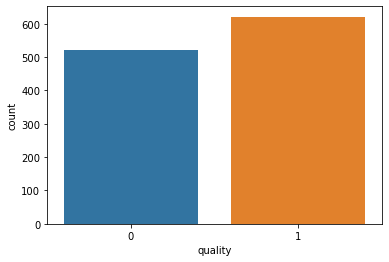

In [14]:
#see the number of good and bad quality
sns.countplot(x='quality', data = wine_quality)

<AxesSubplot:xlabel='pH', ylabel='alcohol'>

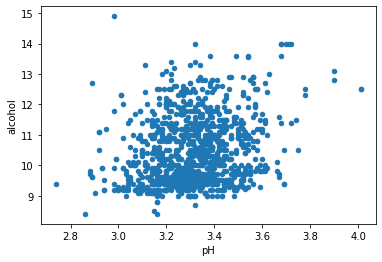

In [15]:
#check if the pH related to alcohol
wine_quality.plot(kind='scatter', x = 'pH', y = 'alcohol')

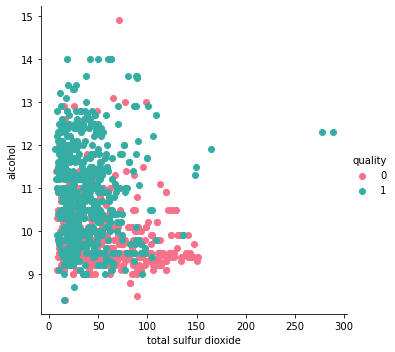

In [16]:
#check the relation between total sulfur dioxide and alcohol by quality
sns.FacetGrid(wine_quality, hue='quality', palette='husl', size=5).map(plt.scatter, 'total sulfur dioxide', 'alcohol').add_legend()

#### Clean your dataset if necessary by removing nans, etc.

In [17]:
wine_quality.isna().head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
#if there are any nan values
wine_quality.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

<AxesSubplot:>

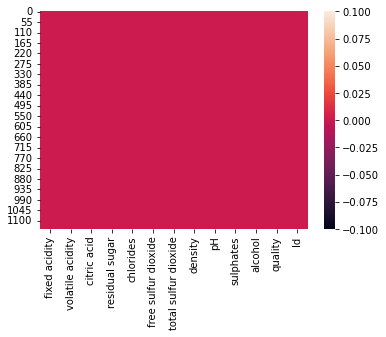

In [19]:
#use data visualization to see if there are any nan values
#results:no nan values
sns.heatmap(wine_quality.isna())

In [20]:
#drop the columns that not need for calculation
wine_quality.drop(['Id'], axis = 1, inplace = True)

In [21]:
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [22]:
#check if drop colum is work
wine_quality.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

#### Divide data into training and test sets (70:30)

In [23]:
X = wine_quality[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

In [24]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [25]:
y = wine_quality[['quality']]
y.head()

,quality
0,0
1,0
2,0
3,1
4,0


In [26]:
#Split data into training and testing sets

from sklearn.model_selection import train_test_split


#Splitting the dataset into the training and test sets 
#70% of the data is used for training and 30% is used for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

#### Perform standardization (if necessary)

In [27]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Fit the model to training data

In [28]:
#Fitting (Training) the model to the training dataset
from sklearn.linear_model import LogisticRegression

#model
classifier = LogisticRegression()

classifier.fit(X_train, y_train)

LogisticRegression()

#### Make predictions using test data (X_test)

In [29]:
y_pred = classifier.predict(X_test)

#a set of the Predicted probabilities
probs_y=classifier.predict_proba(X_test)

#### Generate a confusion matrix

In [30]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[122,  40],
       [ 37, 144]])

In [31]:
pd.DataFrame(confusion_matrix(y_test, y_pred), columns = ['Actual Positive (Good)', 'Actual Negative (Bad)'], index = [ 'Predicted Positive (Good)', 'Predicted Negative (Bad)']          )

,Actual Positive (Good),Actual Negative (Bad)
Predicted Positive (Good),122,40
Predicted Negative (Bad),37,144


#### Generate a classification report

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[122  40]
 [ 37 144]]


In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       162
           1       0.78      0.80      0.79       181

    accuracy                           0.78       343
   macro avg       0.77      0.77      0.77       343
weighted avg       0.78      0.78      0.78       343



In [34]:
y_pred_df = pd.DataFrame(y_pred, columns = ['Predicted Quality'])
y_pred_df

,Predicted Quality
0,0
1,0
2,1
3,0
4,0
...,...
338,1
339,0
340,0
341,1


In [35]:
compare= pd.concat([y_test.reset_index(drop=True), y_pred_df.reset_index(drop=True)], axis=1)
compare

,quality,Predicted Quality
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
338,1,1
339,0,0
340,0,0
341,1,1
